In [1]:
# Este entorno de Python 3 es similar a Jupyter Notebook
# Viene con varias librerías instaladas. Para más információn podés consultar 
# la imagen de docker que utiliza (https://github.com/kaggle/docker-python)

import numpy as np 
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Los archivos del zip "aap2020unlp.zip" están disponibles automáticamente en la 
# carpeta "/kaggle/input/aap2020unlp"
# (o "../input/aap2020unlp")
# Por ejemplo, el siguiente código imprime todos los archivos disponibles:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Cualquier resultado que guarden en el directorio actual queda como un "output" en el workspace

/kaggle/input/aap2020unlp/train/covid/0011.jpg
/kaggle/input/aap2020unlp/train/covid/0032.jpg
/kaggle/input/aap2020unlp/train/covid/0060.jpg
/kaggle/input/aap2020unlp/train/covid/0067.jpg
/kaggle/input/aap2020unlp/train/covid/0015.jpg
/kaggle/input/aap2020unlp/train/covid/0034.jpg
/kaggle/input/aap2020unlp/train/covid/0062.jpg
/kaggle/input/aap2020unlp/train/covid/0063.jpg
/kaggle/input/aap2020unlp/train/covid/0068.jpg
/kaggle/input/aap2020unlp/train/covid/0046.jpg
/kaggle/input/aap2020unlp/train/covid/0000.jpg
/kaggle/input/aap2020unlp/train/covid/0071.jpg
/kaggle/input/aap2020unlp/train/covid/0064.jpg
/kaggle/input/aap2020unlp/train/covid/0013.jpg
/kaggle/input/aap2020unlp/train/covid/0076.jpg
/kaggle/input/aap2020unlp/train/covid/0070.jpg
/kaggle/input/aap2020unlp/train/covid/0074.jpg
/kaggle/input/aap2020unlp/train/covid/0029.jpg
/kaggle/input/aap2020unlp/train/covid/0045.jpg
/kaggle/input/aap2020unlp/train/covid/0056.jpg
/kaggle/input/aap2020unlp/train/covid/0083.jpg
/kaggle/input

Hay 3 directorios con los tres subconjuntos de datos:  ['train', 'val', 'test']
La carpeta de cada subconjunto tiene tres subcarpetas: normal, covid y pneumonia
Las imágenes tienen tamaño: (600, 600)


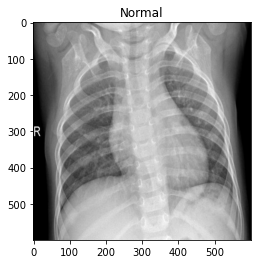

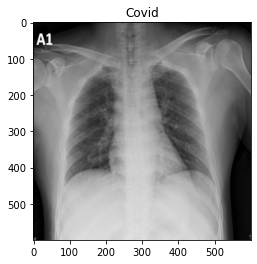

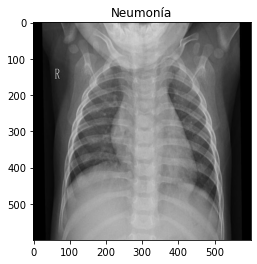

In [2]:
from keras.preprocessing.image import load_img

dataset_folderpath="/kaggle/input/aap2020unlp/"
print("Hay 3 directorios con los tres subconjuntos de datos: ",os.listdir(dataset_folderpath))
print("La carpeta de cada subconjunto tiene tres subcarpetas: normal, covid y pneumonia")

train_folderpath = os.path.join(dataset_folderpath, "train")
val_folderpath = os.path.join(dataset_folderpath, "val")
test_folderpath = os.path.join(dataset_folderpath, "test")

img_name = '0000.jpg'
image_path= f'normal/{img_name}'
img_normal = load_img(os.path.join(train_folderpath, image_path))

print(f"Las imágenes tienen tamaño: {img_normal.size}")

plt.imshow(img_normal)
plt.title("Normal")
plt.show()

img_name = '0000.jpg'
image_path= f'covid/{img_name}'
img_covid = load_img(os.path.join(train_folderpath, image_path))
plt.imshow(img_covid)
plt.title("Covid")
plt.show()


img_name = '0000.jpg'
image_path= f'pneumonia/{img_name}'
img_pneumonia = load_img(os.path.join(train_folderpath,image_path))
plt.imshow(img_pneumonia)
plt.title("Neumonía")
plt.show()

In [3]:
from keras.preprocessing.image import ImageDataGenerator


# Tamaño objetivo para escalar las imágenes. 
IMG_SIZE = 64
h,w,c = IMG_SIZE, IMG_SIZE, 3
batch_size = 32

# Preprocesamiento de cada subconjunto
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generadores de los subconjuntos. Reciben un directorio, y 
# cada carpeta del directorio se interpreta como una clase distinta.
# En este caso como cada directorio tiene 3 subdirectorios, normal, covid y pneumonia,
# por ende, habrá tres clases.
train_generator = train_datagen.flow_from_directory(
    train_folderpath, # directorio de donde cargar las imagenes (train)
    target_size=(h, w),
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_folderpath, # directorio de donde cargar las imagenes (val)
    target_size=(h, w),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_folderpath, # directorio de donde cargar las imagenes (test)
    target_size=(h, w),
    batch_size=batch_size,
    class_mode=None, # IMPORTANTE ya que los ej de test no tienen clase
    shuffle=False # IMPORTANTE ya que nos importa el orden para el archivo de submission
    )


n_train=train_generator.samples
n_val=val_generator.samples
n_test=test_generator.samples
n_clases=train_generator.num_classes
print(f"Los conjuntos de train, val y test tienen {n_train}, {n_val} y {n_test} ejemplos respectivamente.")
print(f"Los conjuntos de datos tienen {n_clases} clases.")

Found 6784 images belonging to 3 classes.
Found 680 images belonging to 3 classes.
Found 1219 images belonging to 1 classes.
Los conjuntos de train, val y test tienen 6784, 680 y 1219 ejemplos respectivamente.
Los conjuntos de datos tienen 3 clases.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

def create_model():
    model = Sequential()
    
    model.add(Flatten(input_shape=(h, w, c)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    return model

In [5]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6291968   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 6,324,995
Trainable params: 6,324,995
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
from keras import backend as K
# Definición de las métricas F1, recall y precision utilizando Keras.

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
        precision = precision_m(y_true, y_pred)
        recall = recall_m(y_true, y_pred)
        return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [7]:
from keras.optimizers import Adam

lr = 0.0003
epochs = 3

optim = Adam(lr=lr, decay=lr / epochs)
val_steps = max(1, n_val // batch_size)

model.compile(loss="categorical_crossentropy", optimizer=optim, metrics=["accuracy", f1_m, precision_m, recall_m])
model.fit_generator(train_generator,
                    steps_per_epoch=n_train // batch_size,
                    epochs=epochs,
                    validation_data=val_generator,
                    validation_steps=val_steps
                    )

Epoch 1/3
212/212 [==============================] - 37s 173ms/step - loss: 0.3928 - accuracy: 0.8541 - f1_m: 0.8511 - precision_m: 0.8520 - recall_m: 0.8502 - val_loss: 0.2365 - val_accuracy: 0.9092 - val_f1_m: 0.9082 - val_precision_m: 0.9117 - val_recall_m: 0.9048
Epoch 2/3
212/212 [==============================] - 23s 109ms/step - loss: 0.2394 - accuracy: 0.9092 - f1_m: 0.9093 - precision_m: 0.9097 - recall_m: 0.9089 - val_loss: 0.1996 - val_accuracy: 0.9196 - val_f1_m: 0.9209 - val_precision_m: 0.9222 - val_recall_m: 0.9196
Epoch 3/3
212/212 [==============================] - 23s 107ms/step - loss: 0.2248 - accuracy: 0.9188 - f1_m: 0.9184 - precision_m: 0.9193 - recall_m: 0.9176 - val_loss: 0.2441 - val_accuracy: 0.9092 - val_f1_m: 0.9092 - val_precision_m: 0.9092 - val_recall_m: 0.9092


In [8]:
# Evaluar el accuracy del modelo en el conjunto entero de entrenamiento
print("*********** Conjunto de entrenamiento ***********")
train_generator.reset()
_ = model.predict_generator(train_generator, steps=n_train // batch_size)
scores = model.evaluate_generator(train_generator, steps=n_train // batch_size)
for metric, score in zip(model.metrics_names, scores):
    print(f"{metric}: {score:.2f}")

print()
# Evaluar el accuracy del modelo en el conjunto entero de validación
print("*********** Conjunto de validación ***********")
val_generator.reset()
_ = model.predict_generator(val_generator, steps=n_val // batch_size)
scores = model.evaluate_generator(val_generator, steps=n_val // batch_size)
for metric, score in zip(model.metrics_names, scores):
    print(f"{metric}: {score:.2f}")

*********** Conjunto de entrenamiento ***********
loss: 0.19
accuracy: 0.93
f1_m: 0.93
precision_m: 0.93
recall_m: 0.93

*********** Conjunto de validación ***********
loss: 0.24
accuracy: 0.91
f1_m: 0.91
precision_m: 0.91
recall_m: 0.91


In [9]:
# predecir sobre el conjunto de test y generar el csv resultante
y_prob = model.predict_generator(test_generator, steps=n_test // batch_size + 1)
y_pred = np.argmax(y_prob, axis=-1)
# quitar el nombre de la carpeta del nombre de archivo
filenames = [os.path.basename(f) for f in test_generator.filenames]
# igual cant de archivos que de predicciones
assert(len(y_pred) == len(filenames))

# Generar CSV con las predicciones
import csv
with open('solutions.csv', mode='w') as f:
    writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    writer.writerow(['Id', 'Expected'])
    print("Id, Expected")
    for f, y in zip(filenames, y_pred):
        print(f"{f}, {str(y)}")
        writer.writerow([f, str(y)])

Id, Expected
0000.jpg, 0
0001.jpg, 2
0002.jpg, 1
0003.jpg, 1
0004.jpg, 2
0005.jpg, 2
0006.jpg, 1
0007.jpg, 0
0008.jpg, 2
0009.jpg, 2
0010.jpg, 2
0011.jpg, 2
0012.jpg, 2
0013.jpg, 2
0014.jpg, 2
0015.jpg, 1
0016.jpg, 0
0017.jpg, 2
0018.jpg, 1
0019.jpg, 1
0020.jpg, 1
0021.jpg, 2
0022.jpg, 1
0023.jpg, 2
0024.jpg, 1
0025.jpg, 2
0026.jpg, 1
0027.jpg, 2
0028.jpg, 2
0029.jpg, 2
0030.jpg, 2
0031.jpg, 2
0032.jpg, 2
0033.jpg, 1
0034.jpg, 2
0035.jpg, 1
0036.jpg, 1
0037.jpg, 1
0038.jpg, 1
0039.jpg, 2
0040.jpg, 2
0041.jpg, 2
0042.jpg, 1
0043.jpg, 1
0044.jpg, 2
0045.jpg, 2
0046.jpg, 1
0047.jpg, 2
0048.jpg, 1
0049.jpg, 2
0050.jpg, 2
0051.jpg, 1
0052.jpg, 1
0053.jpg, 2
0054.jpg, 2
0055.jpg, 0
0056.jpg, 1
0057.jpg, 2
0058.jpg, 2
0059.jpg, 2
0060.jpg, 2
0061.jpg, 1
0062.jpg, 1
0063.jpg, 2
0064.jpg, 1
0065.jpg, 1
0066.jpg, 2
0067.jpg, 0
0068.jpg, 2
0069.jpg, 2
0070.jpg, 1
0071.jpg, 1
0072.jpg, 0
0073.jpg, 1
0074.jpg, 2
0075.jpg, 1
0076.jpg, 1
0077.jpg, 2
0078.jpg, 1
0079.jpg, 2
0080.jpg, 2
0081.jpg, 1
008